In [1]:
import numpy as np
import matplotlib.pyplot as plt

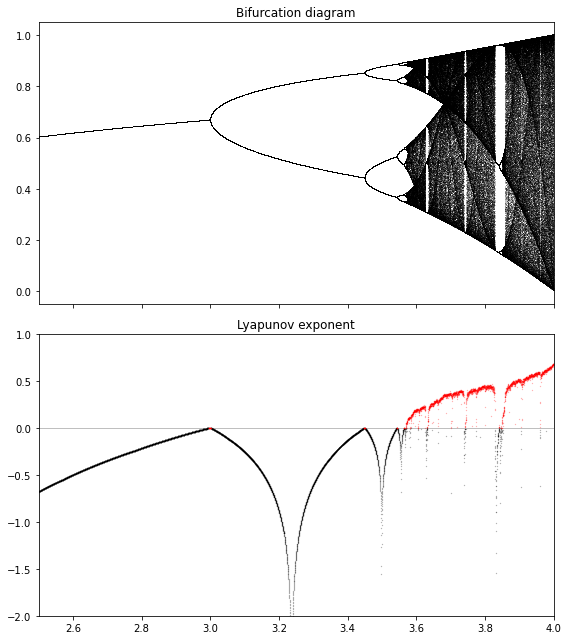

In [2]:
def logistic(r, x):
    return r * x * (1 - x)

def logistic_map(x0, r, T):
    """
    Returns a time series of length T using the logistic map
    x_(n+1) = r*x_n(1-x_n) at parameter r and using the initial condition x0.

    INPUT: x0 - Initial condition, 0 <= x0 <= 1
            r - Bifurcation parameter, 0 <= r <= 4
            T - length of the desired time series
    """
    #  Initialize the time series array
    timeSeries = np.empty(T)

    timeSeries[0] = x0
    for i in range(1, len(timeSeries)):
        xn = timeSeries[i - 1]
        timeSeries[i] = r * xn * (1 - xn)

    return timeSeries


n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100

x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")


ax2.axhline(0, color='k', lw=.5, alpha=.5)
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)

ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

In [56]:
def get_p(series, c):
    p = np.zeros(len(series))
    p[0] = series[0]*np.cos(c)
    for i in range(1,len(series)):
        p[i] = p[i-1]+series[i]*np.cos((i+1)*c)
    return p

        
def get_q(series, c):
    q = np.zeros(len(series))
    q[0] = series[0]*np.sin(c)
    for i in range(1,len(series)):
        q[i] = q[i-1]+series[i]*np.sin((i+1)*c)
    return q
    


def Zero_One_Test(timeSeries, c):
    N = len(timeSeries)
    p = get_p(timeSeries, c)
    q = get_q(timeSeries, c)
    

    n = N//10
    Mc = np.zeros(n)
    Dc = np.zeros(n)

    meanpower = np.square(np.mean(timeSeries))
    
    for num in range(n):
        sumMean = 0
        for i in range(N-num):
            sumMean+=np.square(p[i+num]-p[i])+np.square(q[i+num]-q[i])
        Mc[num] = (1/N)*sumMean
        Dc[num] = Mc[num] - meanpower*((1-np.cos(num*c))/(1-np.cos(c)))
    
        
    
    # Vosc = meanpower*((1-np.cos(n*c))/(1-np.cos(c)))
    # Dc = Mc - Vosc
    Dreg = Dc[n-1] + 1.1*np.min(np.abs(Dc))
    Kc = np.log(Dreg)/np.log(n)
    return Kc
    

In [55]:
"""c = np.pi*(1/5)+np.pi*(3/5)*np.random.random_sample(100)
Kc1 = np.zeros(100)
Kc2 = np.zeros(100)
tSeries_1 = logistic_map(1e-3, 3.4, 3000)
tSeries_2 = logistic_map(1e-3, 3.97, 3000)

for i in range(100):
    Kc1[i] = Zero_One_Test(tSeries_1, c[i])
    Kc2[i] = Zero_One_Test(tSeries_2, c[i])

K1 = np.median(Kc1)
K2 = np.median(Kc2)

K1"""
tSeries_1 = logistic_map(1e-3, 3.4, 3000)
Kc1 = Zero_One_Test(tSeries_1, np.pi*2/5)
Kc1


0.28217028254239485